Esta línea instala la biblioteca `yfinance `si aún no está instalada en tu entorno de Google Colab. `yfinance` es una biblioteca de Python que se utiliza para acceder a datos financieros de Yahoo Finance.

In [ ]:
pip install pandas yfinance

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore')

**`import tensorflow as tf`**: Importa la biblioteca TensorFlow, que es una biblioteca de código abierto para aprendizaje automático y aprendizaje profundo. Se utiliza ampliamente para la construcción y entrenamiento de modelos de aprendizaje automático.

**`import numpy as np`**: Importa la biblioteca NumPy y la renombra como "np". NumPy es una biblioteca fundamental para la manipulación de arreglos y matrices en Python.

**`import matplotlib.pyplot as plt`**: Importa la biblioteca Matplotlib y la renombra como "plt". Matplotlib se utiliza para crear visualizaciones y gráficos en Python.

**`import seaborn as sns`**: Importa la biblioteca Seaborn, que es una biblioteca de visualización de datos basada en Matplotlib. Seaborn proporciona una interfaz de alto nivel para crear gráficos atractivos y estadísticamente informativos.

**`import pandas as pd`**: Importa la biblioteca pandas, que se utiliza para la manipulación y análisis de datos tabulares.

**`from sklearn.preprocessing import MinMaxScaler`**: Importa la clase MinMaxScaler desde la biblioteca scikit-learn (`sklearn`), que se utiliza para escalar los datos a un rango específico (por lo general, entre 0 y 1) para el preprocesamiento de datos.

**`from datetime import datetime`**: Importa la clase datetime desde la biblioteca datetime. datetime se utiliza para trabajar con fechas y horas.

**`from datetime import timedelta`**: Importa la clase timedelta desde la biblioteca datetime. timedelta se utiliza para representar una diferencia de tiempo entre dos fechas o horas.

**`from tqdm import tqdm`**: Importa la función tqdm desde la biblioteca tqdm. tqdm se utiliza para mostrar barras de progreso al realizar bucles o tareas que pueden llevar tiempo.

**`sns.set()`**: Establece la configuración predeterminada de Seaborn para mejorar la estética de las gráficas generadas con Matplotlib y Seaborn.

**`tf.compat.v1.random.set_random_seed(1234)`**: Establece una semilla (seed) para la generación de números aleatorios en TensorFlow. Esto se utiliza para que los resultados sean reproducibles cuando se utiliza TensorFlow en tareas de aprendizaje automático que involucran aleatoriedad, como la inicialización de pesos en redes neuronales.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from datetime import timedelta
from tqdm import tqdm
sns.set()
tf.compat.v1.random.set_random_seed(1234)

Importar datos

In [ ]:
import gdown
import pandas as pd

import shutil

# Ruta del archivo en Google Drive
ruta_drive = "/content/drive/My Drive/GOOG-year.csv"

# Ruta de destino en Google Colab
ruta_colab = "/content/GOOG-year.csv"

# Copia el archivo desde Google Drive a Google Colab
shutil.copy(ruta_drive, ruta_colab)

'/content/GOOG-year.csv'

In [ ]:
import pandas as pd

# Ruta del archivo copiado en Google Colab
ruta_colab = "/content/GOOG-year.csv"

# Carga el archivo en un DataFrame de pandas
df = pd.read_csv(ruta_colab)

# Muestra las primeras filas del DataFrame
print(df.head())


         Date        Open        High        Low       Close   Adj Close  \
0  2022-10-11   98.250000  100.120003  97.250000   98.050003   98.050003   
1  2022-10-12   98.269997   99.648003  97.669998   98.300003   98.300003   
2  2022-10-13   95.930000  100.529999  95.269997   99.709999   99.709999   
3  2022-10-14  100.625000  101.290001  97.029999   97.180000   97.180000   
4  2022-10-17   99.519997  101.769997  99.510002  100.779999  100.779999   

     Volume  
0  21617700  
1  17343400  
2  32812200  
3  22624800  
4  23311600  


***minmax*** = `MinMaxScaler().fit(df.iloc[:, 4:5].astype('float32'))`: Se crea una instancia de MinMaxScaler y se aplica el método fit para ajustar el escalador a los datos en la columna 4 (quinta columna, ya que se usa indexación basada en cero) del DataFrame df. La llamada a astype(`'float32'`) convierte los valores de la columna en números de punto flotante de 32 bits. El propósito de esta línea es calcular los valores mínimos y máximos en la columna especificada para normalizar los datos.

**`df_log`** = `minmax.transform(df.iloc[:, 4:5].astype('float32'))`: Se aplica la transformación de Min-Max a los datos de la columna 4 del DataFrame df usando el escalador previamente ajustado. Esto escala los valores de la columna para que estén en el rango `[0, 1]`en función de los valores mínimos y máximos calculados en la etapa anterior.

**`df_log`**= `pd.DataFrame(df_log)`: Los datos escalados se convierten nuevamente en un DataFrame de pandas y se almacenan en la variable `df_log`. Esto se hace para facilitar el manejo y análisis posterior de los datos.

**`df_log.head()`**: Muestra las primeras filas del DataFrame `df_log` para que puedas verificar la escala de los datos transformados.

In [ ]:
minmax = MinMaxScaler().fit(df.iloc[:, 4:5].astype('float32')) # Close index
df_log = minmax.transform(df.iloc[:, 4:5].astype('float32')) # Close index
df_log = pd.DataFrame(df_log)
df_log.head()

,0
0,0.250129
1,0.254424
2,0.278646
3,0.235183
4,0.297028


**`test_size`** = 30: Se define la variable `test_size` y se le asigna el valor 30. Esta variable representa el tamaño del conjunto de prueba que se utilizará para evaluar el modelo.

**`simulation_size`** = 10: Se define la variable `simulation_size` y se le asigna el valor 10. Sin embargo, no se utiliza en el código que has proporcionado.

**`df_train`** = `df_log.iloc[:-test_size]`: Se crea un nuevo DataFrame llamado df_train utilizando la indexación basada en números de fila para seleccionar todas las filas desde el principio del DataFrame `df_log` hasta (pero no incluyendo) las últimas 30 filas, que se corresponden con el conjunto de prueba.

**`df_test`** = `df_log.iloc[-test_size:]`: Se crea otro DataFrame llamado df_test utilizando la indexación para seleccionar las últimas 30 filas del DataFrame `df_log`, que se utilizarán como conjunto de prueba.

**`df.shape`**, **`df_train.shape`**, **`df_test.shape`**: Esto muestra las formas (número de filas y columnas) de los DataFrames `df`, `df_train`, y `df_test`. Estas dimensiones se muestran para que puedas verificar cuántos datos hay en cada conjunto. La salida de este código será una tupla que contiene tres valores: la forma de `df`, la forma de `df_train` y la forma de `df_test`.

In [ ]:
test_size = 30
simulation_size = 10

df_train = df_log.iloc[:-test_size]
df_test = df_log.iloc[-test_size:]
df.shape, df_train.shape, df_test.shape

((252, 7), (222, 1), (30, 1))

-Se importan las bibliotecas `TensorFlow` (`tf`) y `NumPy` (`np`) al comienzo del código.

-Se define la clase Model que representa el modelo de la red neuronal. El constructor **`__init__`** toma varios parámetros, incluyendo la tasa de aprendizaje (`learning_rate`), el número de capas (`num_layers`), el tamaño de entrada (`size`), el tamaño de cada capa (`size_layer`), el tamaño de salida (`output_size`), y el sesgo de olvido (`forget_bias`).

-En el método **`__init__`**, se crea una función lstm_cell que devuelve una celda GRU (unidad recurrente de puertas) de TensorFlow con el tamaño especificado.

-Se crea una pila de capas de celdas RNN utilizando `tf.nn.rnn_cell.MultiRNNCell.` El número de capas se especifica con num_layers.
Se definen los marcadores de posición `self.X` y `self.Y` para los datos de entrada y salida, respectivamente.

-Se aplica una capa de dropout a las celdas RNN utilizando `tf.contrib.rnn.DropoutWrapper.`

-Se definen marcadores de posición para la capa oculta **`self.hidden_layer`**, las salidas de la RNN (`self.outputs`), y el estado final de la RNN (`self.last_state`).

-Se calculan las salidas y el estado final de la RNN utilizando `tf.nn.dynamic_rnn.`

-Se define una capa densa (`tf.layers.dense`) que transforma la salida de la RNN en las predicciones `self.logits`.

-Se define la función de costo como el error cuadrado medio (`self.cost`) entre las predicciones y los valores reales.

-Se define el optimizador como el optimizador Adam (`self.optimizer`) que minimiza el costo.

-Se define la función `calculate_accuracy` que toma dos arreglos, real y `predict`, y calcula la precisión de las predicciones. La función escala los valores sumando 1, calcula un porcentaje basado en la diferencia entre los valores reales y predichos, y devuelve el porcentaje de precisión.

-Se define la función `anchor` que toma una señal (arreglo) y un peso, y aplica un suavizado exponencial ponderado a la señal. La función itera a través de la señal y calcula un nuevo valor suavizado en función del valor anterior y el peso.

El valor suavizado se almacena en un búfer y se utiliza para suavizar la señal de entrada.

In [ ]:
class Model:
    def __init__(
        self,
        learning_rate,
        num_layers,
        size,
        size_layer,
        output_size,
        forget_bias = 0.1,
    ):
        def lstm_cell(size_layer):
            return tf.nn.rnn_cell.GRUCell(size_layer)

        backward_rnn_cells = tf.nn.rnn_cell.MultiRNNCell(
            [lstm_cell(size_layer) for _ in range(num_layers)],
            state_is_tuple = False,
        )
        forward_rnn_cells = tf.nn.rnn_cell.MultiRNNCell(
            [lstm_cell(size_layer) for _ in range(num_layers)],
            state_is_tuple = False,
        )
        self.X = tf.placeholder(tf.float32, (None, None, size))
        self.Y = tf.placeholder(tf.float32, (None, output_size))
        drop_backward = tf.contrib.rnn.DropoutWrapper(
            backward_rnn_cells, output_keep_prob = forget_bias
        )
        forward_backward = tf.contrib.rnn.DropoutWrapper(
            forward_rnn_cells, output_keep_prob = forget_bias
        )
        self.backward_hidden_layer = tf.placeholder(
            tf.float32, shape = (None, num_layers * size_layer)
        )
        self.forward_hidden_layer = tf.placeholder(
            tf.float32, shape = (None, num_layers * size_layer)
        )
        self.outputs, self.last_state = tf.nn.bidirectional_dynamic_rnn(
            forward_backward,
            drop_backward,
            self.X,
            initial_state_fw = self.forward_hidden_layer,
            initial_state_bw = self.backward_hidden_layer,
            dtype = tf.float32,
        )
        self.outputs = tf.concat(self.outputs, 2)
        self.logits = tf.layers.dense(self.outputs[-1], output_size)
        self.cost = tf.reduce_mean(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(
            self.cost
        )

def calculate_accuracy(real, predict):
    real = np.array(real) + 1
    predict = np.array(predict) + 1
    percentage = 1 - np.sqrt(np.mean(np.square((real - predict) / real)))
    return percentage * 100

def anchor(signal, weight):
    buffer = []
    last = signal[0]
    for i in signal:
        smoothed_val = last * weight + (1 - weight) * i
        buffer.append(smoothed_val)
        last = smoothed_val
    return buffer

In [ ]:
num_layers = 1
size_layer = 128
timestamp = 5
epoch = 300
dropout_rate = 0.8
future_day = test_size
learning_rate = 0.01

Este fragmento de código es una extensión o modificación de la función `forecast()` que se mencionó previamente. La función `forecast()` en este código utiliza una arquitectura de red neuronal diferente (**`Bidirectional GRU`**) en lugar de LSTM. Además, los parámetros y los datos se definen nuevamente al principio del código.

1) Los parámetros, como `size_layer`, `timestamp`, `epoch`, `test_size`, `num_layers`, `dropout_rate`, `future_day` y `learning_rate`, se definen nuevamente al comienzo del código.

2) La función `forecast()` recibe como argumentos `df_log` (que es el DataFrame de datos de series de tiempo escalados), `size_layer`, `timestamp`, `epoch`, `test_size` y `minmax` (un objeto MinMaxScaler utilizado para la inversión de la escala).

3) El modelo de red neuronal utilizado en esta versión de forecast() es `Bidirectional GRU` (una arquitectura de red neuronal recurrente que procesa la secuencia en ambas direcciones). Las capas `Bidirectional GRU` se utilizan para predecir las series de tiempo futuras.

4) La lógica de entrenamiento del modelo es similar a la versión anterior. Se utilizan lotes secuenciales de datos para entrenar el modelo.

5) Las predicciones futuras se realizan de manera similar, utilizando la red `Bidirectional GRU` entrenada.

6) Al final, se aplica una inversión de escala para convertir las predicciones nuevamente a la escala original de los datos de series de tiempo.

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Bidirectional, GRU, Dense
from sklearn.preprocessing import MinMaxScaler
from datetime import timedelta
from tqdm import tqdm
# Parámetros y datos
test_size = 30
simulation_size = 10
size_layer = 128
timestamp = 5
epoch = 300
num_layers = 1
dropout_rate = 0.8
future_day = test_size
learning_rate = 0.01


# Definir la función para realizar predicciones
def forecast(df_log, size_layer, timestamp, epoch, test_size, minmax):
    # Código para entrenar el modelo y hacer predicciones
    df_train = df_log.iloc[:-test_size]
    df_test = df_log.iloc[-test_size:]

    model = Sequential()
    model.add(Bidirectional(GRU(size_layer, input_shape=(timestamp, df_train.shape[1]), return_sequences=True)))
    model.add(Bidirectional(GRU(size_layer, return_sequences=True)))
    model.add(Dense(df_train.shape[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')

    date_ori = pd.to_datetime(df_log.iloc[:, 0]).tolist()
    pbar = tqdm(range(epoch), desc='train loop')

    for i in pbar:
        init_value = np.zeros((1, num_layers * size_layer))
        total_loss, total_acc = [], []
        for k in range(0, df_train.shape[0] - 1, timestamp):
            index = min(k + timestamp, df_train.shape[0] - 1)
            batch_x = np.zeros((1, 5, 1))
            batch_x[0, :index - k, 0] = df_train.iloc[k : index, :].values.reshape(-1)
            batch_y = np.zeros((1, 5, 1))
            batch_y[0, :index - k, 0] = df_train.iloc[k + 1 : index + 1, :].values.reshape(-1)
            loss = model.train_on_batch(batch_x, batch_y)
            total_loss.append(loss)
            pbar.set_postfix(cost=np.mean(total_loss))

    future_day = test_size
    output_predict = np.zeros((df_train.shape[0] + future_day, df_train.shape[1]))
    output_predict[0] = df_train.iloc[0].values
    upper_b = (df_train.shape[0] // timestamp) * timestamp
    init_value = np.zeros((1, num_layers * size_layer))

    for k in range(0, (df_train.shape[0] // timestamp) * timestamp, timestamp):
        out_logits = model.predict(df_train.iloc[k : k + timestamp, :].values.reshape(1, timestamp, -1))
        output_predict[k + 1 : k + timestamp + 1] = out_logits[0]

    if upper_b != df_train.shape[0]:
        out_logits = model.predict(df_train.iloc[upper_b:, :].values.reshape(1, df_train.shape[0] - upper_b, -1))
        output_predict[upper_b + 1 : df_train.shape[0] + 1] = out_logits[0]
        future_day -= 1
        date_ori.append(date_ori[-1] + timedelta(days=1))

    init_value = out_logits[0]

    for i in range(future_day):
        o = output_predict[-future_day - timestamp + i:-future_day + i]
        out_logits = model.predict(o.reshape(1, timestamp, -1))
        output_predict[-future_day + i, 0] = out_logits[0, -1, 0]
        date_ori.append(date_ori[-1] + timedelta(days=1))

    output_predict = minmax.inverse_transform(output_predict)
    deep_future = anchor(output_predict[:, 0], 0.3)

    return deep_future[-test_size:]


Este fragmento de código realiza un ciclo de simulación para generar múltiples conjuntos de predicciones futuras utilizando la función `forecast()` que has definido previamente.

1) Se crea una lista vacía llamada `results` que se utilizará para almacenar las predicciones de múltiples simulaciones.

2) Se inicia un bucle for que se ejecutará `simulation_size` veces. `simulation_size` se ha definido previamente como 10 en tu código.

3) En cada iteración del bucle, se imprime un mensaje que indica el número de simulación actual, como `"simulation 1"`, `"simulation 2"`, etc.

4) Luego, se llama a la función `forecast()` para realizar una simulación y se agrega el resultado a la lista `results`. La función `forecast()` genera predicciones futuras para un conjunto de datos de series de tiempo y retorna las predicciones suavizadas.

In [ ]:
# Llamada a la función forecast() para realizar las simulaciones
results = []
for i in range(simulation_size):
    print('Simulation %d' % (i + 1))
    results.append(forecast(df_log, size_layer, timestamp, epoch, test_size, minmax))

Simulation 1


train loop: 100%|██████████| 300/300 [06:53<00:00,  1.38s/it, cost=0.000284]


1/1 [==============================] - 0s 25ms/step
Simulation 2


train loop: 100%|██████████| 300/300 [06:57<00:00,  1.39s/it, cost=0.00104]


1/1 [==============================] - 0s 21ms/step
Simulation 3


train loop: 100%|██████████| 300/300 [06:43<00:00,  1.35s/it, cost=0.000415]


1/1 [==============================] - 0s 33ms/step
Simulation 4


train loop: 100%|██████████| 300/300 [06:54<00:00,  1.38s/it, cost=0.000371]


1/1 [==============================] - 0s 23ms/step
Simulation 5


train loop: 100%|██████████| 300/300 [06:52<00:00,  1.38s/it, cost=0.000452]


1/1 [==============================] - 0s 21ms/step
Simulation 6


train loop: 100%|██████████| 300/300 [06:41<00:00,  1.34s/it, cost=0.00111]


1/1 [==============================] - 0s 21ms/step
Simulation 7


train loop: 100%|██████████| 300/300 [06:56<00:00,  1.39s/it, cost=0.000326]


1/1 [==============================] - 0s 25ms/step
Simulation 8


train loop: 100%|██████████| 300/300 [06:51<00:00,  1.37s/it, cost=0.000544]


1/1 [==============================] - 0s 23ms/step
Simulation 9


train loop: 100%|██████████| 300/300 [06:45<00:00,  1.35s/it, cost=0.000359]


1/1 [==============================] - 0s 23ms/step
Simulation 10


train loop: 100%|██████████| 300/300 [06:47<00:00,  1.36s/it, cost=0.000258]


1/1 [==============================] - 0s 21ms/step


Este fragmento de código calcula la precisión de las predicciones y luego crea un gráfico que muestra las predicciones generadas por el modelo en comparación con la tendencia real en los datos.

1) Se crea una lista llamada `accuracies` que se utilizará para almacenar las precisiones calculadas para cada conjunto de predicciones generado en las simulaciones.

2) Se inicia un bucle for que itera a través de cada conjunto de predicciones en la lista `results`.

3) Para cada conjunto de predicciones en results, se llama a la función `calculate_accuracy()` para calcular la precisión de las predicciones en comparación con la tendencia real. La precisión se almacena en la lista `accuracies`.

4) Se crea un gráfico utilizando la biblioteca `Matplotlib (plt)`. El gráfico tendrá las siguientes características:

*Se establece el tamaño del gráfico en 15x5 pulgadas.

*Se itera a través de cada conjunto de predicciones en `results` y se trazan en el gráfico con etiquetas que indican `"forecast 1"`, `"forecast 2"`, etc.

*Se traza la tendencia real de los datos en negro (etiquetada como `"true trend"`).
*Se agrega una leyenda que muestra las etiquetas de las predicciones y la tendencia real.

*Se agrega un título al gráfico que muestra la precisión promedio de todas las simulaciones calculadas a partir de la lista `accuracies`.

5) Finalmente, se muestra el gráfico utilizando `plt.show()`.

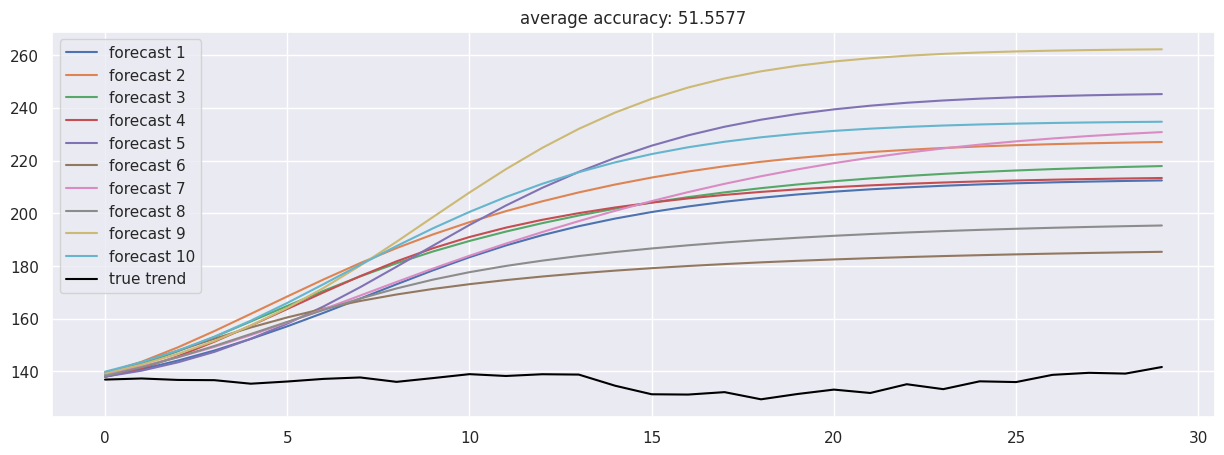

In [ ]:
accuracies = [calculate_accuracy(df['Close'].iloc[-test_size:].values, r) for r in results]

plt.figure(figsize = (15, 5))
for no, r in enumerate(results):
    plt.plot(r, label = 'forecast %d'%(no + 1))
plt.plot(df['Close'].iloc[-test_size:].values, label = 'true trend', c = 'black')
plt.legend()
plt.title('average accuracy: %.4f'%(np.mean(accuracies)))
plt.show()